Welcome to the AI-Powered Personal Finance Advisor!
All inputs and outputs are in USD.

Enter your monthly income (in USD): 200000
Enter your monthly rent (in USD): 8000
Enter your monthly grocery expenses (in USD): 1000
Enter your monthly tuition fees (in USD): 30000
Enter your other monthly expenses (in USD): 60000

Projected Savings for the month: USD 1.41

You are overspending in the following categories:
 - miscellaneous: USD 60000.00


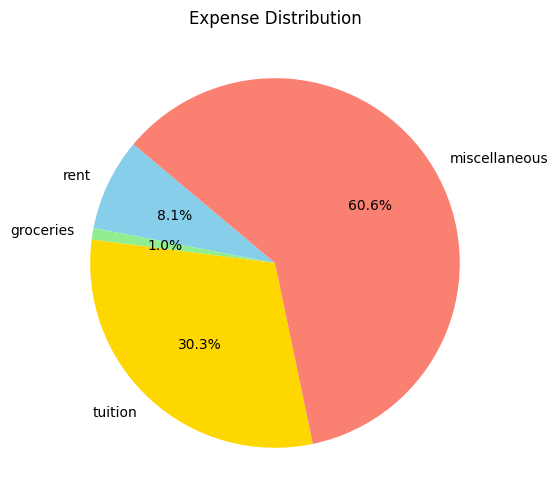

In [ ]:
# ✅ Install required libraries (only needed in Google Colab)
!pip install pandas numpy scikit-learn openai

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate synthetic data for training
def generate_synthetic_data():
    data = {
        "monthly_income": np.random.randint(1500, 5000, 100),
        "expenses": np.random.randint(1000, 4000, 100),
        "savings": np.random.randint(100, 1000, 100),
    }
    return pd.DataFrame(data)

# Preprocess user input
def preprocess_data(user_data, data):
    new_row = {
        "monthly_income": user_data["monthly_income"],
        "expenses": sum(user_data["expenses"].values()),
        "savings": 0,  # Placeholder for prediction
    }
    # Use pd.concat instead of append
    return pd.concat([data, pd.DataFrame([new_row])], ignore_index=True)

# Identify areas of unnecessary spending
def identify_overspending(expenses):
    total_expense = sum(expenses.values())
    overspending = {cat: amt for cat, amt in expenses.items() if amt > 0.4 * total_expense}
    return overspending

# Predict savings using Linear Regression
def predict_savings(data):
    X = data[["monthly_income", "expenses"]].values
    y = data["savings"].values
    model = LinearRegression()
    model.fit(X, y)
    prediction = model.predict(X[-1].reshape(1, -1))
    return float(prediction[0])

# Recommend investments using a Neural Network
def recommend_investments(user_profile):
    model = Sequential([
        Dense(16, input_dim=3, activation="relu"),
        Dense(8, activation="relu"),
        Dense(3, activation="softmax"),  # Categories: Mutual Funds, Stocks, Fixed Deposits
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Dummy training data
    investment_data = np.array([[3000, 2000, 1], [4000, 2500, 2], [5000, 3000, 3]])
    investment_labels = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Labels
    model.fit(investment_data, investment_labels, epochs=10, verbose=0)

    prediction = model.predict(np.array([list(user_profile.values())]))
    categories = ["Mutual Funds", "Stocks", "Fixed Deposits"]
    return {categories[i]: float(prediction[0][i]) for i in range(3)}

# Visualize expenses
def visualize_expenses(expenses):
    labels = expenses.keys()
    amounts = expenses.values()
    plt.figure(figsize=(8, 6))
    plt.pie(amounts, labels=labels, autopct="%1.1f%%", startangle=140, colors=["skyblue", "lightgreen", "gold", "salmon"])
    plt.title("Expense Distribution")
    plt.show()

# Main function
def main():
    print("Welcome to the AI-Powered Personal Finance Advisor!")
    print("All inputs and outputs are in USD.\n")

    # Generate synthetic data
    data = generate_synthetic_data()

    # Get user input
    monthly_income = float(input("Enter your monthly income (in USD): "))
    expenses = {
        "rent": float(input("Enter your monthly rent (in USD): ")),
        "groceries": float(input("Enter your monthly grocery expenses (in USD): ")),
        "tuition": float(input("Enter your monthly tuition fees (in USD): ")),
        "miscellaneous": float(input("Enter your other monthly expenses (in USD): ")),
    }

    user_data = {"monthly_income": monthly_income, "expenses": expenses}
    processed_data = preprocess_data(user_data, data)

    # Predict savings
    predicted_savings = predict_savings(processed_data)
    print(f"\nProjected Savings for the month: USD {predicted_savings:.2f}")

    # Identify overspending
    overspending = identify_overspending(expenses)
    if overspending:
        print("\nYou are overspending in the following categories:")
        for category, amount in overspending.items():
            print(f" - {category}: USD {amount:.2f}")
    else:
        print("\nYou are not overspending in any category.")

    # Visualize expenses
    visualize_expenses(expenses)

    # Recommend investments
    user_profile = {
        "income": monthly_income,
        "savings": predicted_savings,
        "risk_tolerance": int(input("\nRate your risk tolerance (1: Low, 2: Medium, 3: High): ")),
    }
    recommendations = recommend_investments(user_profile)
    print("\nRecommended Investment Options:")
    for category, score in recommendations.items():
        print(f" - {category}: {score * 100:.2f}%")

# Run the program
if __name__ == "__main__":
    main()

